### 三種品種：KerGee, GeeWaWa, Maltese
<p>trian data：6000（各2000張圖片）<p>
<p>test data：737（KerGee:134, GeeWaWa:367, Maltese:236）<p>

## 步驟:
##### 統一圖片資料並轉進array

1. 處理TrainImg
2. 處理TestImg
3. 檢查並修正圖片mode

##### 資料預處理

3. images預處理
4. labels預處理

##### 建立模型

5. 建立模型（CNN）
6. 進行訓練
7. 評估模型準確率
8. 進行預測
9. 查看預測機率
10. 顯示混淆矩陣


# 1. 統一圖片資料並轉進array

In [1]:
#[ 1. 統一圖片資料並轉進array ]

# Step1. 處理TrainImg

# 批量轉換圖片大小並存進要訓練的list
# 轉成32x32

import os
from PIL import Image

DATA_DIR = "OGIRTrainImg/"  # 資料夾路徑
count = 0

train_image = []
train_label = []

# 讀照片並存到train_image，並且判斷label存到train_label
for filename in os.listdir(DATA_DIR):
    if( filename==".DS_Store" ):
        pass
    else:
        im = Image.open(DATA_DIR + filename)
        width = 32
        height = 32
        reim = im.resize((width, height))
        train_image.append(reim)
        
        if( "KerGee" in filename ):
            train_label.append(0)
        elif( "GeeWaWa" in filename ):
            train_label.append(1)
        elif( "Maltese" in filename ):
            train_label.append(2)
        
        count = count+1

In [2]:
# Step2. 處理TestImg

import os
from PIL import Image

DATA_DIR = "OGIRTestImg/"  # 資料夾路徑
count = 0

test_image = []
test_label = []

# 讀照片並存到images，並且判斷label存到labels
for filename in os.listdir(DATA_DIR):
    if( filename==".DS_Store" ):
        pass
    else:
        im = Image.open(DATA_DIR + filename)
        width = 32
        height = 32
        reim = im.resize((width, height))
        test_image.append(reim)
        
        if( "KerGee" in filename ):
            test_label.append(0)
        elif( "GeeWaWa" in filename ):
            test_label.append(1)
        elif( "Maltese" in filename ):
            test_label.append(2)
        
        count = count+1

In [3]:
# Step3. 檢查並修正圖片mode

# 檢查圖片是否為RGB，並修正為RGB

for i, img in enumerate(train_image):
    if( img.mode != 'RGB' ):
        train_image[i] = img.convert('RGB')
        
for i, img in enumerate(test_image):
    if( img.mode != 'RGB' ):
        test_image[i] = img.convert('RGB')

# 2. 檢查images與labels

In [4]:
#[ 2. 查多筆images與labels ]

# Step1. 定義label_dict字典

label_dict = {0:"KerGee", 1:"GeeWaWa", 2:"Maltese"}

In [5]:
# Step2. plot_images_labels_prediction()函數

import matplotlib.pyplot as plt

def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    
    if num>25:
        num=25
        
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = str(i)+', '+label_dict[labels[i]]
        if len(prediction)>0:
            title += '=>'+label_dict[prediction[i]]
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
        
    plt.show()

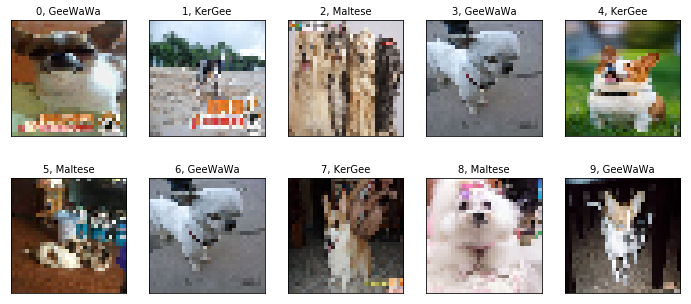

In [6]:
# Step3. 查看訓練資料(train_img)前10筆資料

plot_images_labels_prediction(train_image, train_label, [], 0)

# 3. images預處理

In [7]:
#[ 3. 將images進行預處理 ]

# 匯入相關模組
import numpy as np
np.random.seed(3)

In [8]:
# Step1. 將圖片轉為array

from keras.preprocessing.image import img_to_array
import numpy as np
from PIL import Image

train_img = []
test_img = []

for img in train_image:
    im = img_to_array(img)
    train_img.append(im)

for img in test_image:
    im = img_to_array(img)
    test_img.append(im)

Using TensorFlow backend.


In [9]:
for img in train_image:
    if( img.mode != 'RGB' ):
        print(img)
        
for img in test_image:
    if( img.mode != 'RGB' ):
        print(img)

In [10]:
# Step2. 將list轉為np.array

train_img = np.array(train_img)
train_label = np.array(train_label)
test_img = np.array(test_img)
test_label = np.array(test_label)

In [11]:
# Step3. 查看train_img及train_label情況

print(train_img.shape)
print(train_label.shape)

(6000, 32, 32, 3)
(6000,)


In [12]:
# Step4. 將照片影像image的數字標準化

train_img_normalize = train_img.astype('float32')/255.0
test_img_normalize = test_img.astype('float32')/255.0

In [13]:
# Step5. 查看照片影像image標準化後的結果
train_img_normalize[0][0][0]

array([ 0.49803922,  0.30980393,  0.15294118], dtype=float32)

# 4. labels預處理

In [14]:
#[ 4. 將labels進行預處理 ]#

# Step1. 查看label的原本的shape形狀
train_label.shape

(6000,)

In [15]:
# Step2. 查看前5筆資料
train_label[:5]

array([1, 0, 2, 1, 0])

In [16]:
# Step3. 將label標籤欄位轉換為Onehot encoding
from keras.utils import np_utils
train_label_OneHot = np_utils.to_categorical(train_label)
test_label_OneHot = np_utils.to_categorical(test_label)

In [17]:
# Step4. One-hot encoding轉換之後的label標籤欄位
print(train_label_OneHot.shape)
print(test_label_OneHot.shape)

(6000, 3)
(737, 3)


In [18]:
# Step5. 查看轉換為One-hot encoding之後的結果
train_label_OneHot[:5]

array([[ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  1.,  0.],
       [ 1.,  0.,  0.]])

#  5. 建立模型

In [19]:
#[ 5. 建立模型 ]

# Step1. 匯入所需模組
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, ZeroPadding2D

In [20]:
# Step2. 建立keras的Sequential模型
model = Sequential()

In [21]:
# Step3. 建立卷積層1與池化層1
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3),
                 padding='same', activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=(3, 3),
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [22]:
# Step4. 建立卷積層2與池化層2
model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 padding='same', activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [23]:
# Step5. 建立卷積層3與池化層3
model.add(Conv2D(filters=128, kernel_size=(3, 3),
                 padding='same', activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=(3, 3),
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [24]:
model.add(Conv2D(filters=256, kernel_size=(3, 3),
                 padding='same', activation='relu'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=256, kernel_size=(3, 3),
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [25]:
# Step6. 建立神經網路(平坦層、隱藏層1、隱藏層2、輸出層)
model.add(Flatten())
# model.add(Dropout(0.3))
model.add(Dense(4500, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(3500, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(3, activation='softmax'))

In [26]:
# Step7. 查看模型的摘要
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
__________

# 6. 進行訓練

In [27]:
#[ 6. 進行訓練 ]

# Step1. 定義訓練方式
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [28]:
# Step2. 開始訓練
#  validation_split=0.2,
train_history = model.fit(x = train_img_normalize,
                          y = train_label_OneHot, validation_split=0.2,
                          epochs=20, batch_size=300, shuffle=True, verbose=1)

Train on 4800 samples, validate on 1200 samples
Epoch 1/20
4800/4800 [==============================] - 60s - loss: 1.5487 - acc: 0.3448 - val_loss: 1.0992 - val_acc: 0.3333
Epoch 2/20
4800/4800 [==============================] - 59s - loss: 1.0867 - acc: 0.3796 - val_loss: 1.0911 - val_acc: 0.3767
Epoch 3/20
4800/4800 [==============================] - 59s - loss: 1.1076 - acc: 0.3512 - val_loss: 1.0980 - val_acc: 0.3333
Epoch 4/20
4800/4800 [==============================] - 59s - loss: 1.0948 - acc: 0.3571 - val_loss: 1.0891 - val_acc: 0.3475
Epoch 5/20
4800/4800 [==============================] - 59s - loss: 1.0580 - acc: 0.4371 - val_loss: 1.0513 - val_acc: 0.4317
Epoch 6/20
4800/4800 [==============================] - 60s - loss: 1.0379 - acc: 0.4467 - val_loss: 1.0241 - val_acc: 0.4633
Epoch 7/20
4800/4800 [==============================] - 58s - loss: 1.0162 - acc: 0.4775 - val_loss: 1.0103 - val_acc: 0.4833
Epoch 8/20
4800/4800 [==============================] - 59s - loss: 0.

In [29]:
# Step3. 建立show_train_history顯示訓練過程
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

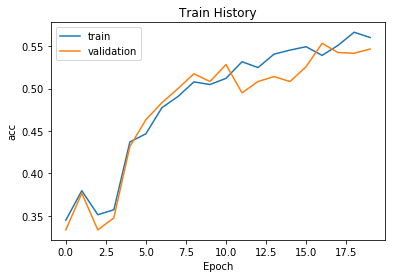

In [30]:
# Step4. 畫出accuracy執行結果
show_train_history(train_history, 'acc', 'val_acc')

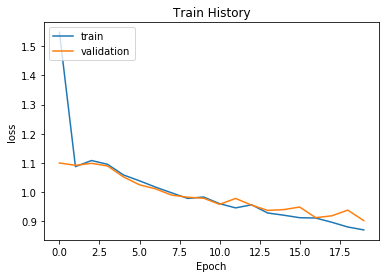

In [31]:
# Step5. 畫出loss誤差執行結果
show_train_history(train_history, 'loss', 'val_loss')

# 7. 評估模型準確率

In [32]:
#[ 7. 評估模型準確率 ]#

# Step1. 評估模型準確率
scores = model.evaluate(test_img_normalize, test_label_OneHot, verbose=0)
scores[1]

0.52645861601085486

# 8. 進行預測

In [45]:
#[ 8. 進行預測 ]#

# Step1. 執行預測
prediction = model.predict_classes(test_img_normalize)

736/737 [============================>.] - ETA: 0s

In [46]:
# Step2. 預測結果
prediction[:10]

array([0, 0, 2, 0, 1, 2, 2, 2, 0, 0], dtype=int64)

In [47]:
# Step3. 定義label_dict字典
label_dict = {0:"KerGee", 1:"GeeWaWa", 2:"Maltese"}

In [48]:
# Step4. 建立plot_images_labels_prediction()函數
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    
    if num>25:
        num=25
        
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = str(i)+', '+label_dict[labels[i]]
        if len(prediction)>0:
            title += '=>'+label_dict[prediction[i]]
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
        
    plt.show()

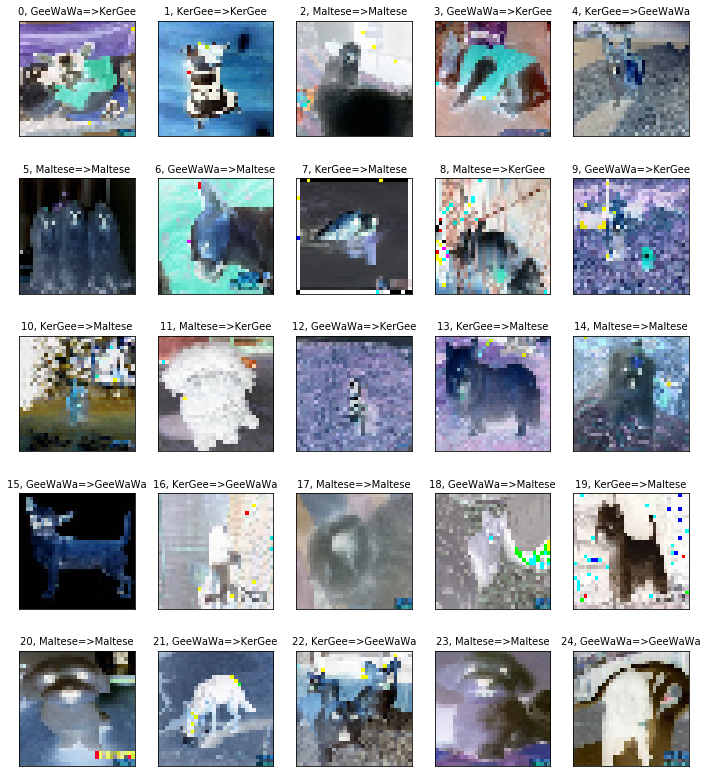

In [49]:
# Step5. 顯示前30筆預測結果
plot_images_labels_prediction(test_img, test_label, prediction, 0, 30)

# 9. 查看預測機率

In [50]:
#[ 9. 查看預測機率 ]#

# Step1. 使用測試資料進行測試
Predicted_Probability = model.predict(test_img_normalize)

In [51]:
# Step2. 建立show_Predicted_Probability函數
def show_Predicted_Probability(y, prediction, x_img, Predicted_Probability, i):
    print('label:', label_dict[y[i]],
          'predict:', label_dict[prediction[i]])
    plt.figure(figsize=(2, 2))
    plt.imshow(np.reshape(test_img[i], (32, 32, 3)))
    plt.show()
    for j in range(3):
        print(label_dict[j]+' Probability:%1.9f'%(Predicted_Probability[i][j]))

label: GeeWaWa predict: KerGee


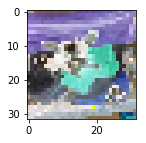

KerGee Probability:0.502325416
GeeWaWa Probability:0.393758059
Maltese Probability:0.103916503


In [52]:
# Step3. 查看第0筆資料預測的機率
show_Predicted_Probability(test_label, prediction, test_img, Predicted_Probability, 0)

label: GeeWaWa predict: KerGee


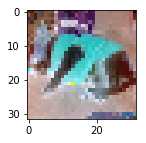

KerGee Probability:0.439791054
GeeWaWa Probability:0.415794641
Maltese Probability:0.144414365


In [53]:
# Step3. 查看第3筆資料預測的機率
show_Predicted_Probability(test_label, prediction, test_img, Predicted_Probability, 3)

# 10. 顯示混淆矩陣

In [54]:
#[ 10. 顯示混淆矩陣 ]#

# Step1. 查看prediction預測結果的形狀
prediction.shape

(737,)

In [55]:
# Step2. 查看y_label_test真實值的shape形狀
test_label.shape

(737,)

In [56]:
# Step3. 使用pandas crosstab建立混淆矩陣
import pandas as pd
print(label_dict)
pd.crosstab(test_label.reshape(-1), prediction, rownames=['label'], colnames=['predict'])

{0: 'KerGee', 1: 'GeeWaWa', 2: 'Maltese'}


predict,0,1,2
label,,,
0,62,50,22
1,117,146,104
2,23,33,180
